## Step 0. configurations

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Step 1. reading data and importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("../data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 2. understanding the data

In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=569, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Step 3. Visualizing

In [9]:
numerical_columns = df.select_dtypes(include="number").columns \
    .drop("id")

numerical_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
categorical_columns = df.select_dtypes(include="object").columns

categorical_columns

Index(['diagnosis'], dtype='object')

In [11]:
boolean_columns = df.select_dtypes(include="bool").columns
boolean_columns

Index([], dtype='object')

### **Distributions**

Numerical columns

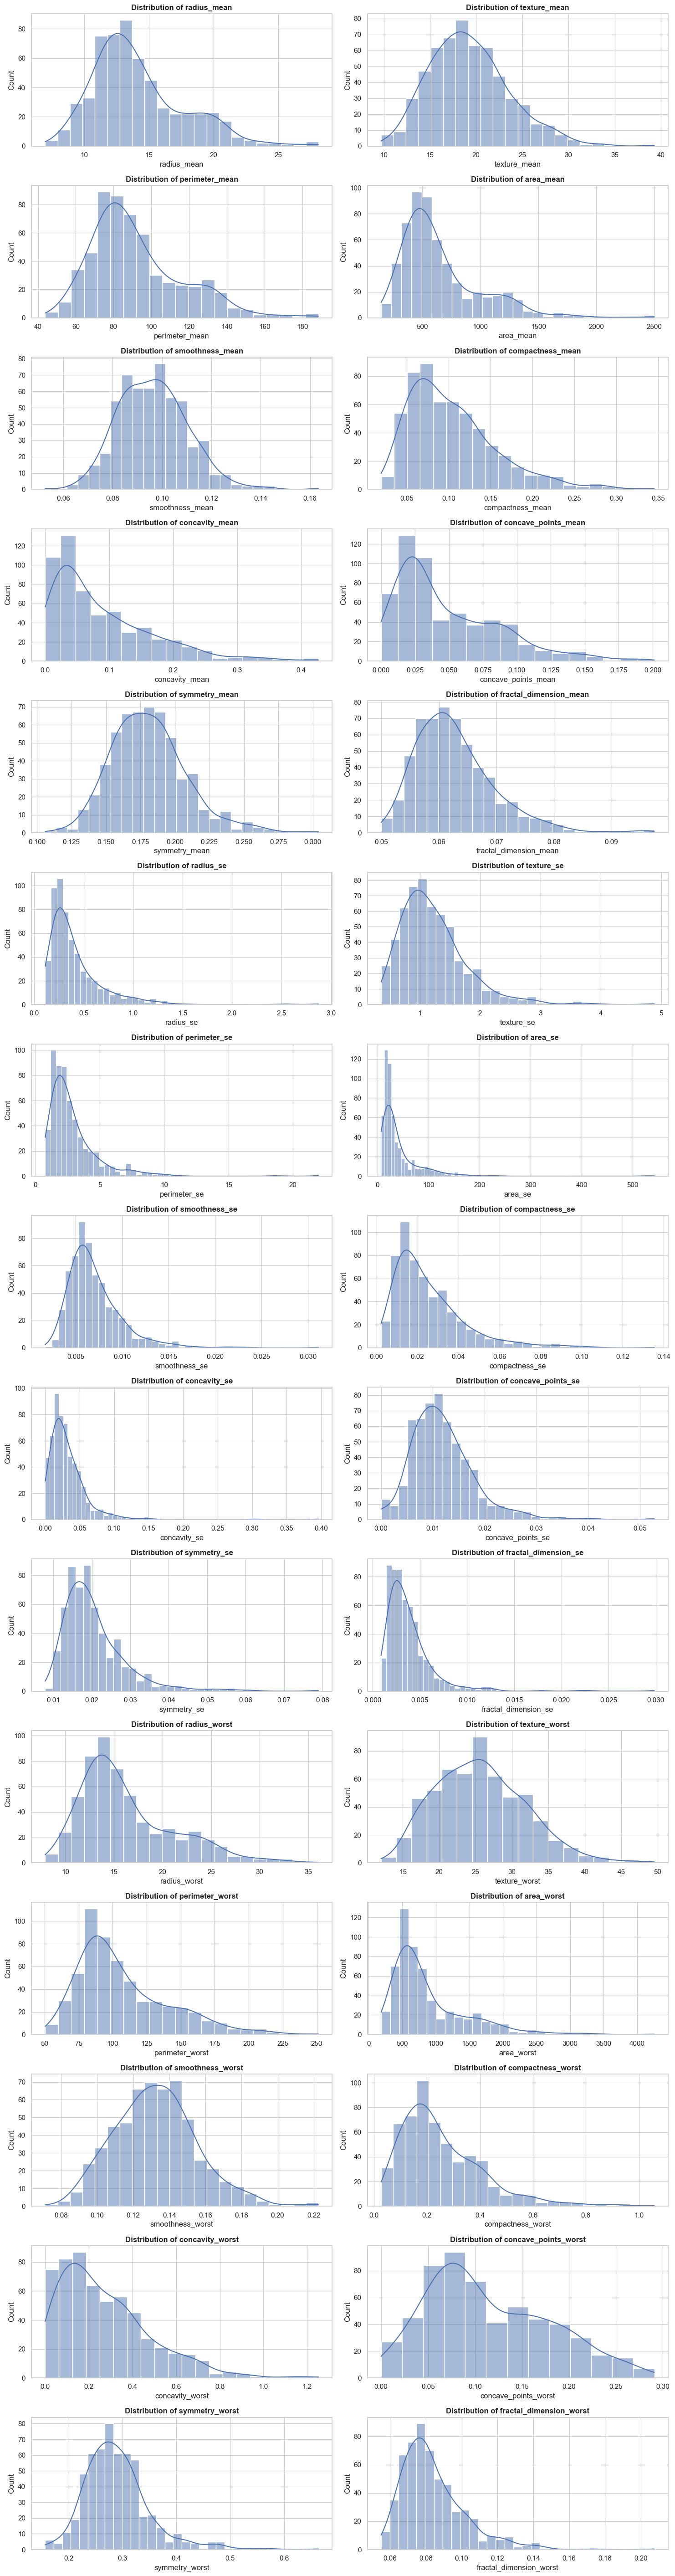

In [12]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

Categorical columns

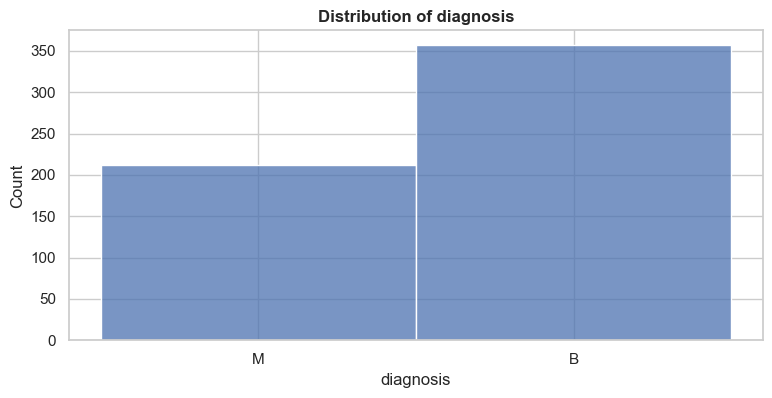

In [13]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.histplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

Boolean columns

In [14]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(boolean_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.countplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

<Figure size 1500x6000 with 0 Axes>

### **Correlations**

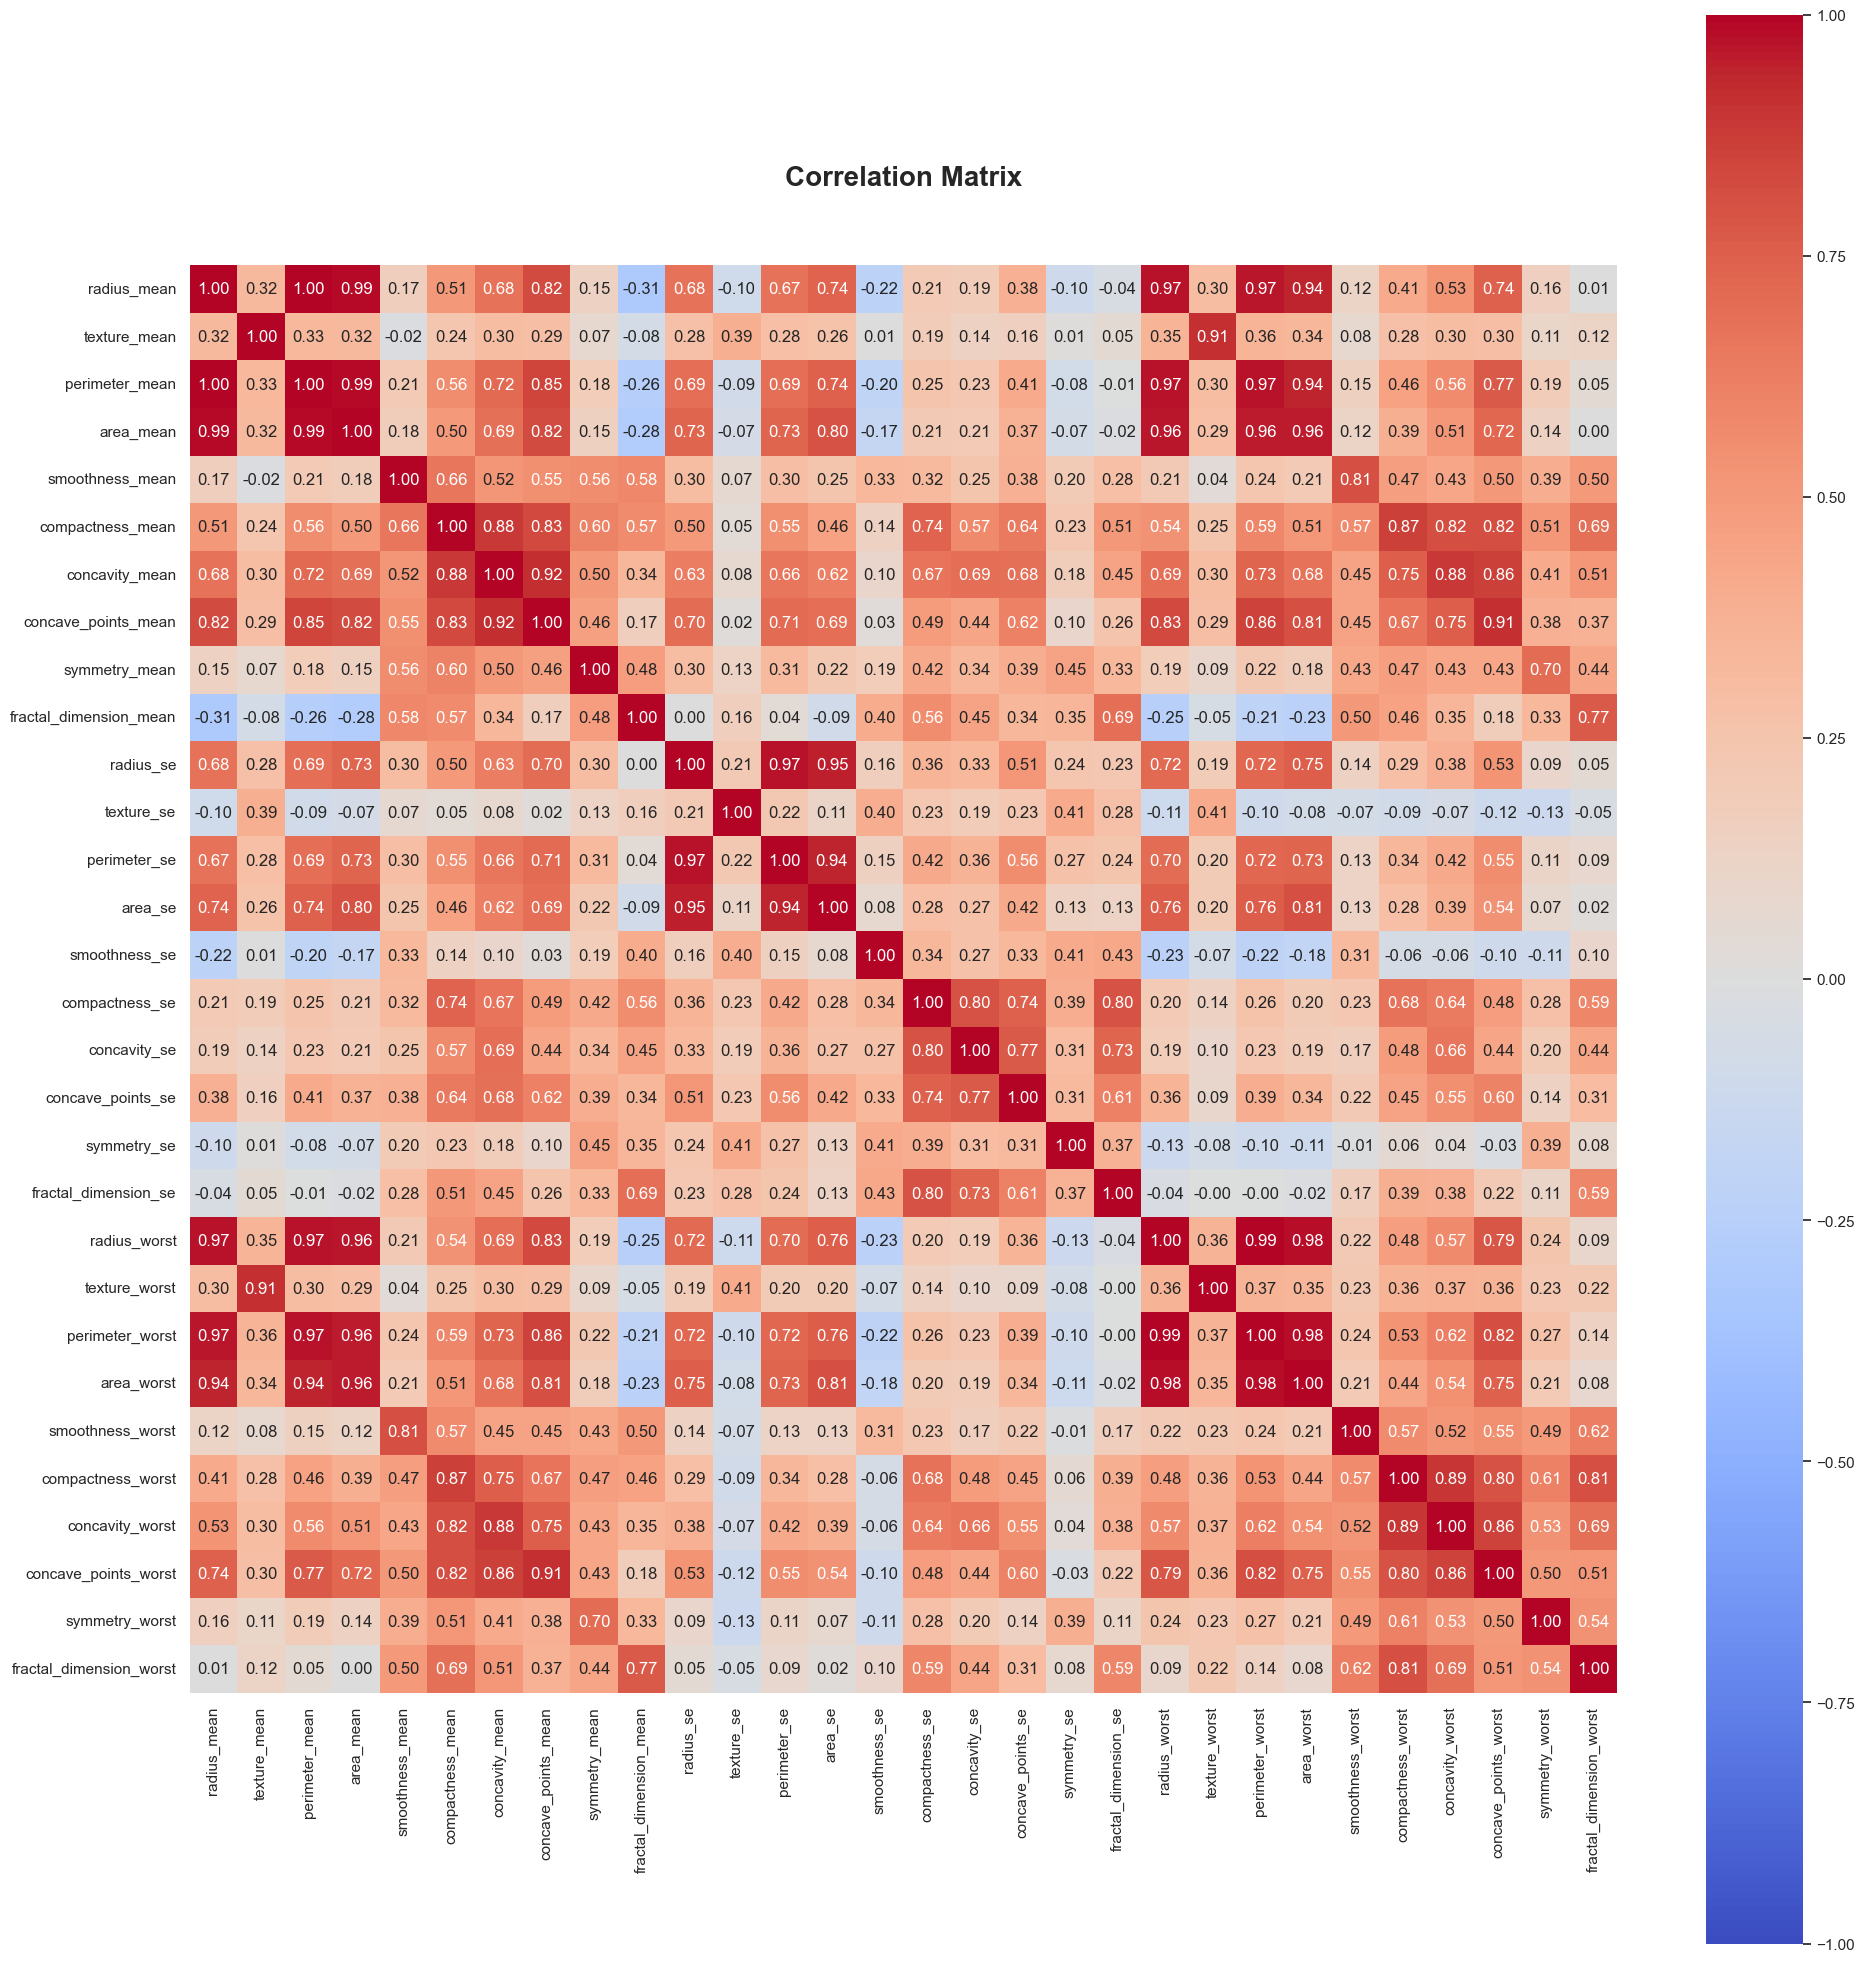

In [15]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, 
    annot=True, 
    square=True, 
    cmap="coolwarm", 
    fmt=".2f",
    vmin=-1, vmax=1
)
plt.title("Correlation Matrix", fontweight="bold", fontsize=20, y=1.05)

plt.tight_layout()
plt.show()

## Step 4: Modelling

The goal for this dataset is to create a classification model that can predict the column `diagnosis`

### Import modelling libraries

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### train_test_split

In [17]:
# # Use LabelEncoder to convert 'B' to 0 and 'M' to 1
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [18]:
X = df.drop(columns=["id", "diagnosis"])    # ID won't help in making a model
y = df["diagnosis"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [20]:
scaler = MinMaxScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_stand, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_stand, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [21]:
# Create dataset and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

### **PyTorch Model Architecture**

### 1. Architecture

In [22]:
class ClassificationModel(nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 100)
        self.bn2 = nn.BatchNorm1d(100)
        self.fc3 = nn.Linear(100, 100)
        self.bn3 = nn.BatchNorm1d(100)
        self.fc4 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.sigmoid(self.fc4(x))
        return x

### 2. Initialisation phase

In [23]:
# Initialise the model, loss function, and optimiser
input_size = X_train_stand.shape[1]
model = ClassificationModel(input_size)

criterion = nn.BCELoss()   # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

### 3. Training loop

In [24]:
num_epochs = 500
patience = 500
best_val_loss = float('inf')
early_stop_counter = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
	model.train()
	running_loss = 0.0
	correct_train = 0
	total_train = 0

	for X_batch, y_batch in train_loader:
		optimizer.zero_grad()
		output = model(X_batch)
		loss = criterion(output, y_batch)
		loss.backward()
		optimizer.step()

		running_loss += loss.item()
		predicted = (output > 0.5).float()
		correct_train += (predicted == y_batch).sum().item()
		total_train += y_batch.size(0)
	
	train_accuracy = correct_train / total_train
	train_loss = running_loss / len(train_loader)

	# Validation
	model.eval()
	val_loss = 0.0
	correct_val = 0
	total_val = 0

	with torch.no_grad():
		for X_batch, y_batch in test_loader:
			output = model(X_batch)
			loss = criterion(output, y_batch)
			val_loss += loss.item()
			predicted = (output > 0.5).float()
			correct_val += (predicted == y_batch).sum().item()
			total_val += y_batch.size(0)
	
	val_accuracy = correct_val / total_val
	val_loss /= len(test_loader)

	train_losses.append(train_loss)
	val_losses.append(val_loss)
	train_accuracies.append(train_accuracy)
	val_accuracies.append(val_accuracy)

	# Early stopping check
	if val_loss < best_val_loss:
		best_val_loss = val_loss
		early_stop_counter = 0
		best_model_state = model.state_dict()   # Save the best model
	else:
		early_stop_counter += 1
	
	if early_stop_counter >= patience:
		print(f"Early stopping at epoch {epoch}")
		model.load_state_dict(best_model_state)
		break

	if epoch % 50 == 0:
		print(f"Epoch {epoch}:\tloss - {train_loss:.4f}, accuracy - {train_accuracy:.4f}, val_loss - {val_loss:.4f}, val_accuracy - {val_accuracy:.4f}")

Epoch 0:	loss - 0.4359, accuracy - 0.8462, val_loss - 0.5935, val_accuracy - 0.8860
Epoch 50:	loss - 0.0358, accuracy - 0.9890, val_loss - 0.1618, val_accuracy - 0.9561
Epoch 100:	loss - 0.0492, accuracy - 0.9868, val_loss - 0.1338, val_accuracy - 0.9649
Epoch 150:	loss - 0.0231, accuracy - 0.9890, val_loss - 0.1387, val_accuracy - 0.9561
Epoch 200:	loss - 0.0269, accuracy - 0.9890, val_loss - 0.1093, val_accuracy - 0.9649
Epoch 250:	loss - 0.0453, accuracy - 0.9824, val_loss - 0.1600, val_accuracy - 0.9561
Epoch 300:	loss - 0.0136, accuracy - 0.9978, val_loss - 0.1096, val_accuracy - 0.9649
Epoch 350:	loss - 0.0135, accuracy - 0.9956, val_loss - 0.1214, val_accuracy - 0.9649
Epoch 400:	loss - 0.0119, accuracy - 0.9956, val_loss - 0.1755, val_accuracy - 0.9561
Epoch 450:	loss - 0.0110, accuracy - 0.9978, val_loss - 0.1792, val_accuracy - 0.9737


#### 4. Evaluation

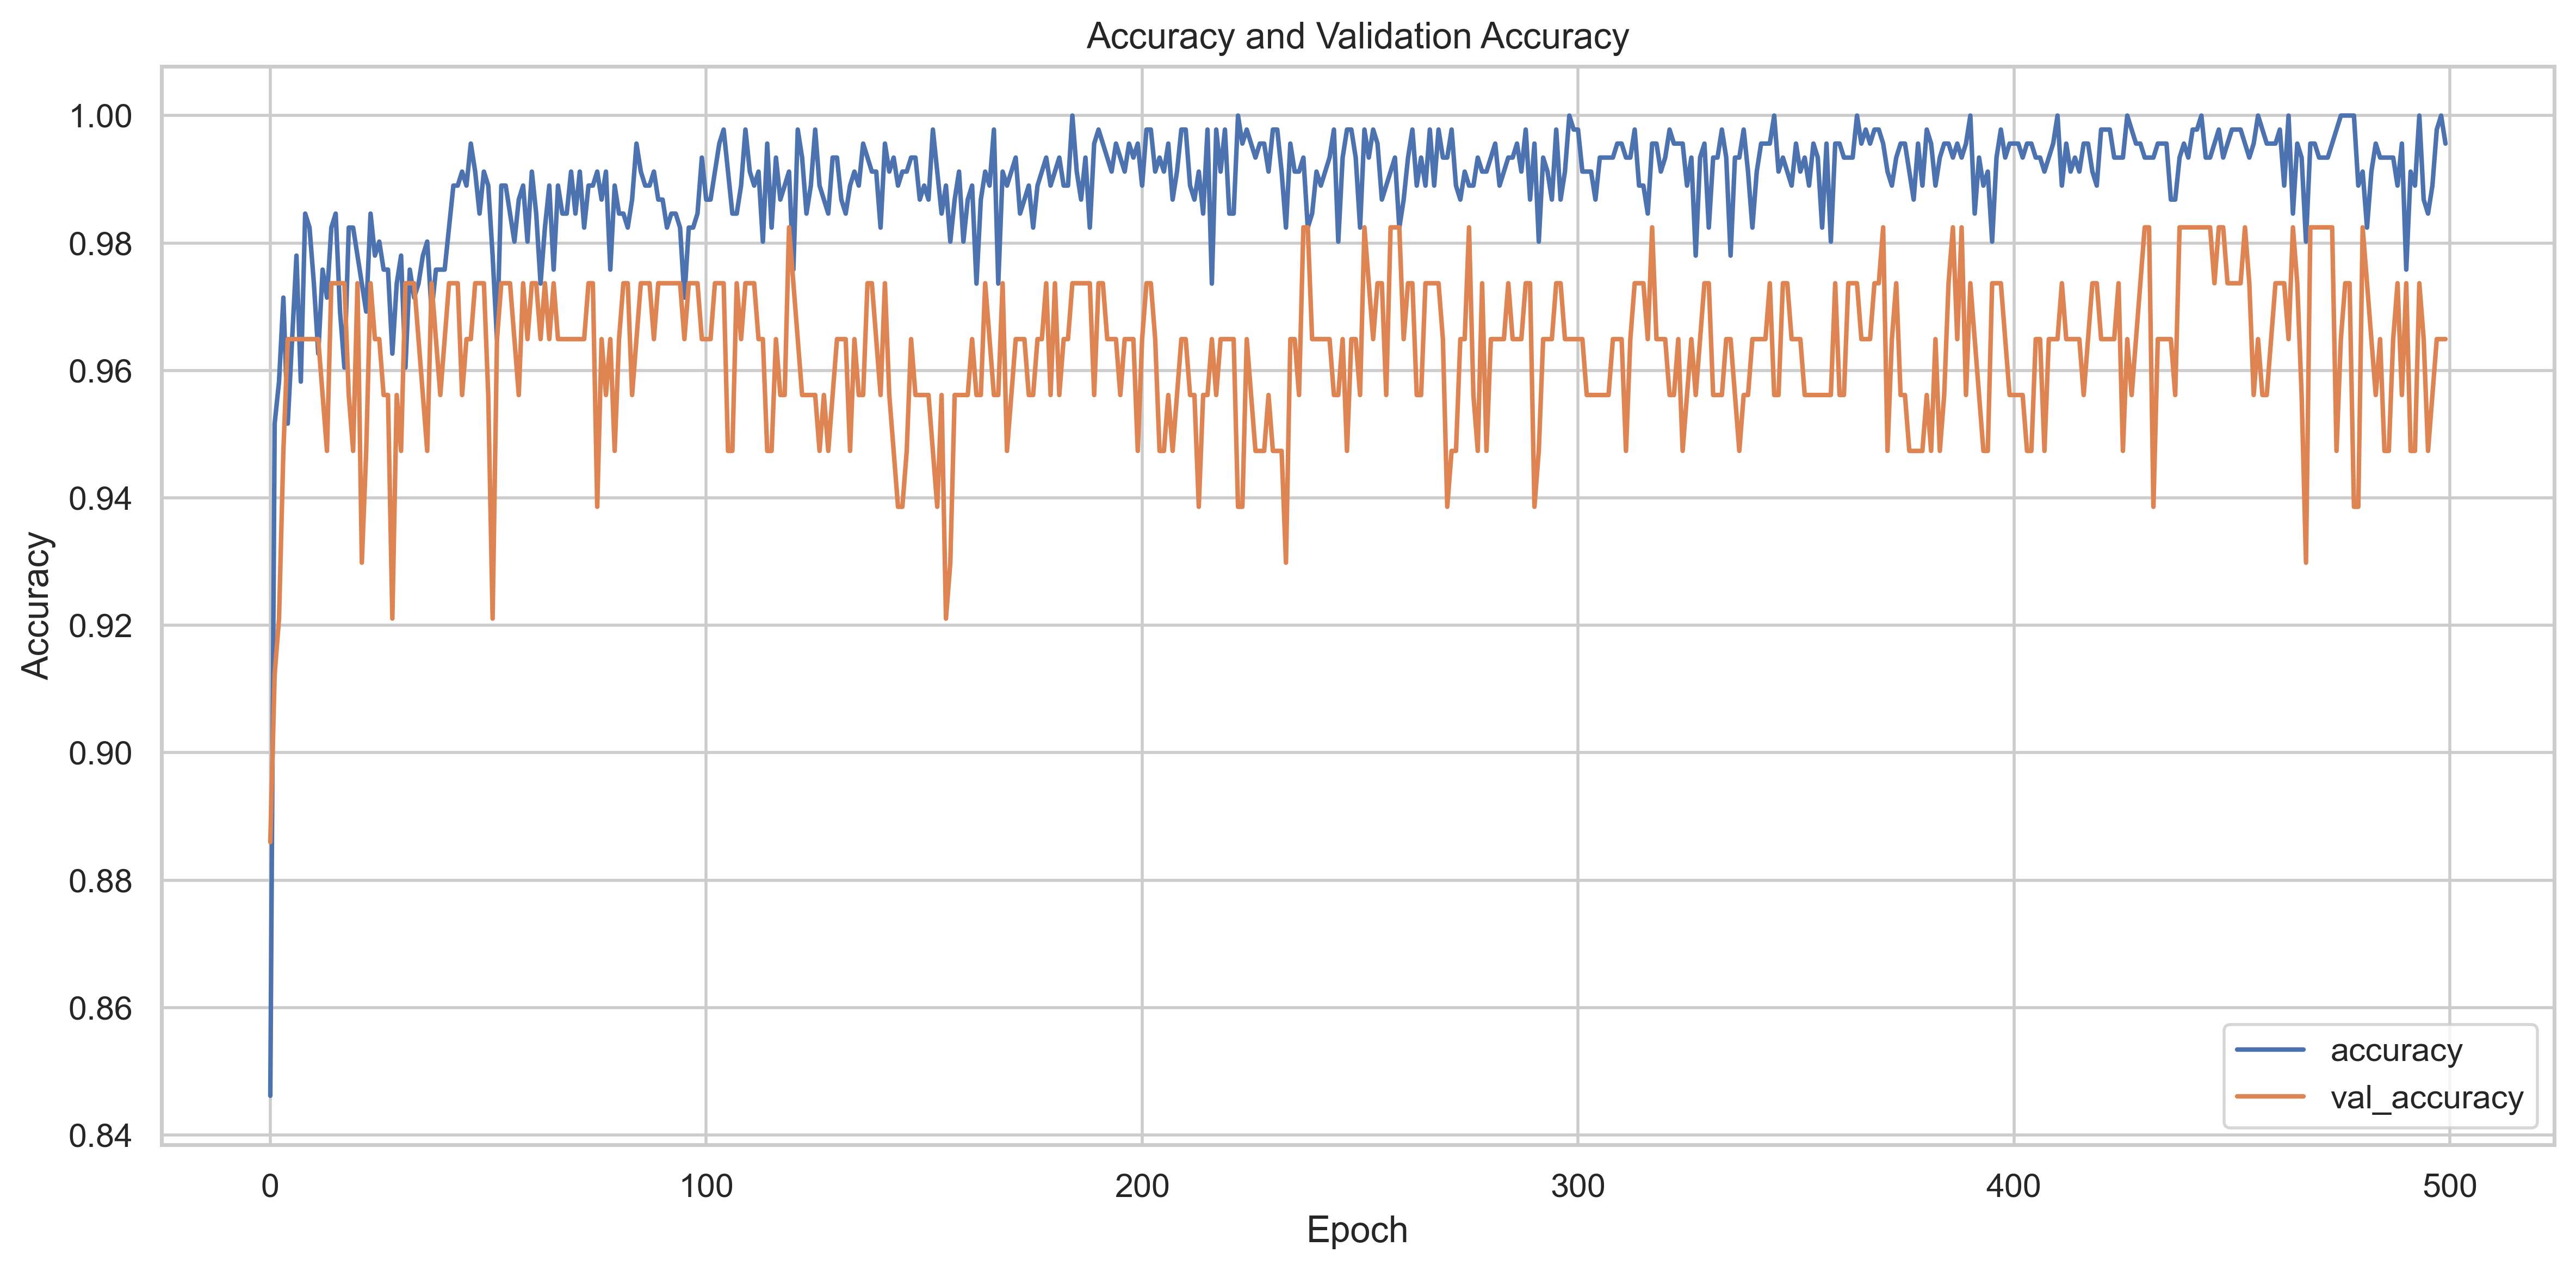

In [34]:
# Plot accuracy and val_accuracy
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(train_accuracies, label='accuracy')
plt.plot(val_accuracies, label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

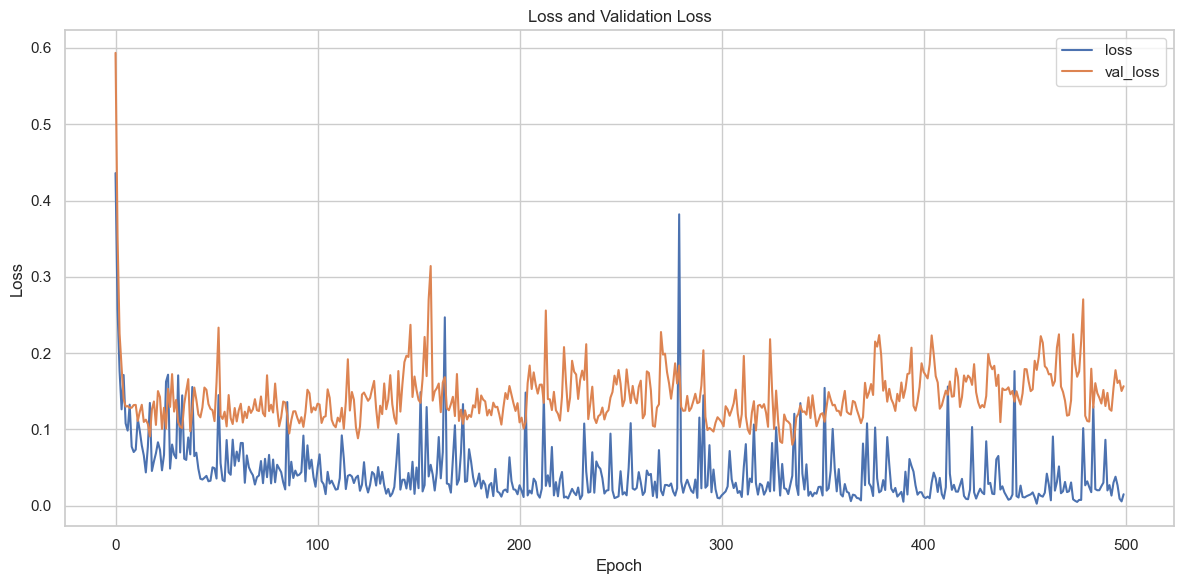

In [26]:
# Plot loss and val_loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 5: Evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
model.eval()
y_pred = []

with torch.no_grad():
	for X_batch, _ in test_loader:
		output = model(X_batch)
		y_pred.extend((output > 0.5).float())

y_pred = torch.cat(y_pred).cpu().numpy().flatten()

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       1.00      0.91      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion matrix:
[[69  0]
 [ 4 41]]
